In [1]:
'''Assignment 2 - Task 1: Perceptron Linear Algorithm (PLA) for the wdbc dataset
AIT-736, Instructor: Dr. Liao, Date: 10/3/2022
Khanh Nguyen, Anisha Mou, Rohan Jonnakuti, Vishveshwar Kondala

The code below using basic Python functions to build PLA algorithms from scratch to implement the basic PLA classification 
for breast tumor: Malignant (1) and Benign (0).  
The first 75% examples are used for training and the remaining 25% for testing.
The training took 3000 iterations. Perceptron classification accuracy over 3000 iterations: 0.9436619718309859
The visualization for accuracy and the first 1000 number of iterations took over 2 hours to complete.

'''
import math
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from collections import Counter


#Changing path to working directory
working_directory = os.getcwd()
os.chdir(working_directory)
print(working_directory)

C:\Users\khanh\Desktop\GMUeducation\AIT736\Assignments\Assignment2


In [2]:
df = pd.read_csv('wdbc1.csv')

df.shape

(568, 32)

In [3]:
vect_df = np.array(df )
print("Shape of Vectorized dataset:",vect_df.shape)
print(vect_df[:4])

Shape of Vectorized dataset: (568, 32)
[[842517 20.57 17.77 132.9 1326.0 0.08474 0.07864 0.0869 0.07017 0.1812
  0.05667 0.5435 0.7339 3.398 74.08 0.005225 0.01308 0.0186 0.0134
  0.01389 0.003532 24.99 23.41 158.8 1956.0 0.1238 0.1866 0.2416 0.186
  0.275 0.08902 'M']
 [84300903 19.69 21.25 130.0 1203.0 0.1096 0.1599 0.1974 0.1279 0.2069
  0.05999 0.7456 0.7869 4.585 94.03 0.00615 0.04006 0.03832 0.02058
  0.0225 0.004571 23.57 25.53 152.5 1709.0 0.1444 0.4245 0.4504 0.243
  0.3613 0.08758 'M']
 [84348301 11.42 20.38 77.58 386.1 0.1425 0.2839 0.2414 0.1052 0.2597
  0.09744 0.4956 1.156 3.445 27.23 0.00911 0.07458 0.05661 0.01867
  0.05963 0.009208 14.91 26.5 98.87 567.7 0.2098 0.8663 0.6869 0.2575
  0.6638 0.173 'M']
 [84358402 20.29 14.34 135.1 1297.0 0.1003 0.1328 0.198 0.1043 0.1809
  0.05883 0.7572 0.7813 5.438 94.44 0.01149 0.02461 0.05688 0.01885
  0.01756 0.005115 22.54 16.67 152.2 1575.0 0.1374 0.205 0.4 0.1625
  0.2364 0.07678 'M']]


In [4]:
X = np.array(vect_df[:,1:-1]) #all data except last column
print("Shape of X", X.shape) 
print(X[:4])
y = np.array(vect_df[:,-1]) #only last column
print("\nShape of y:",y.shape)
print(y[:100])

Shape of X (568, 30)
[[20.57 17.77 132.9 1326.0 0.08474 0.07864 0.0869 0.07017 0.1812 0.05667
  0.5435 0.7339 3.398 74.08 0.005225 0.01308 0.0186 0.0134 0.01389
  0.003532 24.99 23.41 158.8 1956.0 0.1238 0.1866 0.2416 0.186 0.275
  0.08902]
 [19.69 21.25 130.0 1203.0 0.1096 0.1599 0.1974 0.1279 0.2069 0.05999
  0.7456 0.7869 4.585 94.03 0.00615 0.04006 0.03832 0.02058 0.0225
  0.004571 23.57 25.53 152.5 1709.0 0.1444 0.4245 0.4504 0.243 0.3613
  0.08758]
 [11.42 20.38 77.58 386.1 0.1425 0.2839 0.2414 0.1052 0.2597 0.09744
  0.4956 1.156 3.445 27.23 0.00911 0.07458 0.05661 0.01867 0.05963
  0.009208 14.91 26.5 98.87 567.7 0.2098 0.8663 0.6869 0.2575 0.6638
  0.173]
 [20.29 14.34 135.1 1297.0 0.1003 0.1328 0.198 0.1043 0.1809 0.05883
  0.7572 0.7813 5.438 94.44 0.01149 0.02461 0.05688 0.01885 0.01756
  0.005115 22.54 16.67 152.2 1575.0 0.1374 0.205 0.4 0.1625 0.2364
  0.07678]]

Shape of y: (568,)
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'B' 'B' 'B' 'M' '

In [5]:
# using NumPy function 'where' to convert M,B to 1,0: Malignant (1) and Benign (0)
y = np.where(y=='M', 1, 0)
# y = np.array(y, dtype = float )
y[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [6]:
#Split the dataset base on percentage
s_f = 0.75
n_train = math.floor(s_f * X.shape[0])
n_test = math.ceil((1-s_f) * X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 426
Total Number of rows in test: 142


In [7]:
#Task 1.2: Implement PLA optimization from scratch
class Perceptron:
    """- Perceptron is using the Approximation math: y_pred = g(f(w,b)) = g(w^T*x + b)
    - with Perceptron update rule:  
        + For each training sample x_i: w (weight) = w + delta(w)
        + and delta(w) = alpha*(y_i - y_hat)*x_i
        + alpha: is learning rate in [0,1]
    """
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        

    def fit(self, X, y):
        # number of rows and number of features in training set
        n_samples, n_features = X.shape
        print(X.shape)

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # to make sure y is only consisted of 0 and 1, then convert to an array
        y_ = np.array([1 if i > 0 else 0 for i in y])
        #print(y_)

        for _ in range(self.n_iters):
            # to iterate over the training samples set
            for idx, x_i in enumerate(X):
                # linear function is the dot() product of Transposed w(weight) = (w^T)*x + bias
                linear_output = np.dot(x_i, self.weights) + self.bias
                # then apply the Activation over Linear function: y_pred = g(f(w,b)) = g(w^T*x + b)
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                #self.weights += update * x_i
                self.weights = self.weights + update * x_i
                self.bias = self.bias + update
        print("Task 1.3.2 The weights of the training data:\n", self.weights)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    # apply Unit Step Function (either 0 or 1) to multiple rows
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [8]:
# function to calculate the accuracy of the algorithm
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [9]:
%%time
# print(y_train)
# Fit the Perceptron algorithm into training and test set 
p = Perceptron(learning_rate=0.01, n_iters=3000) #set default Perceptron
p.fit(X_train, y_train)  #fit Perceptron into the training set
predictions = p.predict(X_test)

(426, 30)
Task 1.3.2 The weights of the training data:
 [-354.40562000004803 193.8532999999109 -877.8622999998333
 3.8939999999889086 8.015566499999466 39.675228000007344 56.13780890596832
 22.935395480001315 7.606414000000447 2.8128460000000217
 -6.751816999998718 -17.2753850000008 51.54193999998356 132.94263999999453
 1.263277770000347 9.19837826999781 12.84870469599825 2.8267132399998323
 3.514262660001197 0.7580443820000888 -355.8640599999534
 386.11739999996854 -16.097200000101086 81.44000000006385
 14.154612300000178 124.78186510000916 150.8924511299933 42.08049167999308
 32.855146999995576 11.594579400003198]
Wall time: 42.5 s


In [10]:
print("predicted results set shape:", predictions.shape)
predictions

predicted results set shape: (142,)


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [11]:
print("test set shape:", y_test.shape)
y_test

test set shape: (142,)


array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0])

In [12]:
#calculate accuracy against the test set
print("Perceptron classification accuracy over 3000 iterations:", accuracy(y_test, predictions)) 

Perceptron classification accuracy over 3000 iterations: 0.9436619718309859


In [13]:
# Calculate Confusion Matrix without scikit-learn
def confusionmatrix(actual, predicted, normalize = False):

    unique = sorted(set(actual))
    matrix = [[0 for _ in unique] for _ in unique]
    imap   = {key: i for i, key in enumerate(unique)}
    # Generate Confusion Matrix
    for p, a in zip(predicted, actual):
        matrix[imap[p]][imap[a]] += 1
    # Matrix Normalization
    if normalize:
        sigma = sum([sum(matrix[imap[i]]) for i in unique])
        matrix = [row for row in map(lambda i: list(map(lambda j: j / sigma, i)), matrix)]
    return matrix

cm = confusionmatrix(y_test, predictions)
print("Confusion matrix for test set")
for line in cm:
    print(line)

Confusion matrix for test set
[106, 7]
[1, 28]


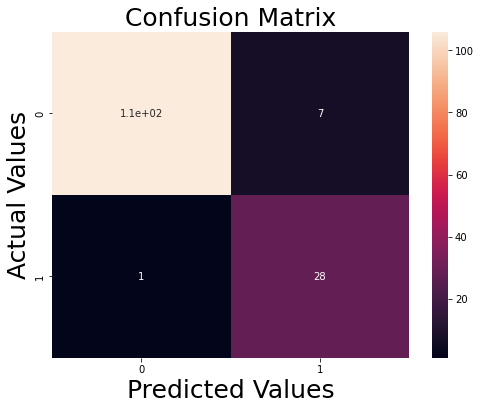

In [14]:
#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix', size = 25)
plt.ylabel('Actual Values', size = 25)
plt.xlabel('Predicted Values', size = 25)
plt.show()

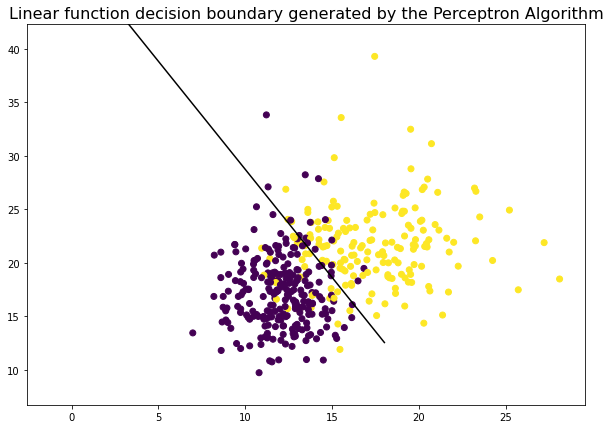

In [15]:
#some visualizations
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)

x0_1 = -np.amin(X_train[:,0])
x0_2 = -np.amax(X_train[:,0]) 

x1_1 = (p.weights[0] * x0_1 + p.bias) / p.weights[1] 
x1_2 = (p.weights[0] * x0_2 + p.bias) / p.weights[1] 

ax.plot([x0_1+25, x0_2+27], [x1_1, x1_2], 'k')

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim([ymin-3,ymax+3])

plt.title("Linear function decision boundary generated by the Perceptron Algorithm", size=16)
plt.show()

In [16]:
#Task 1.4: Collect accuracy scores from 1000 iterations of applying the PLA over the training set
class Perceptron:
    """- is the Approximation math: y_pred = g(f(w,b)) = g(w^T*x + b)
    - with Perceptron update rule:  
        + For each training sample x_i: w (weight) = w + delta(w)
        + and delta(w) = alpha*(y_i - y_hat)*x_i
        + alpha: is learning rate in [0,1]
    """
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        

    def fit(self, X, y):
        # number of rows and number of features in training set
        n_samples, n_features = X.shape
#         print(X.shape)

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # to make sure y is only consisted of 0 and 1, then convert to an array
        y_ = np.array([1 if i > 0 else 0 for i in y])
        #print(y_)

        for _ in range(self.n_iters):
            # to iterate over the training samples set
            for idx, x_i in enumerate(X):
                # linear function is the dot() product = (w^T)*x + bias
                linear_output = np.dot(x_i, self.weights) + self.bias
                # then apply the Activation over Linear function: y_pred = g(f(w,b)) = g(w^T*x + b)
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                #self.weights += update * x_i
                self.weights = self.weights + update * x_i
                self.bias = self.bias + update
#         print("Task 1.3.2 The weights of the training data:\n", self.weights)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    # apply Unit Step Function (either 0 or 1) to multiple rows
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [17]:
# function to calculate the accuracy of the algorithm
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [22]:
%%time 
#get the accuracy for each iteration, with total number of iterations =400
accuracy_list = []
for n_iter in range(1,1000):
    p = Perceptron(learning_rate=0.01, n_iters=n_iter) #set default Perceptron
    p.fit(X_train, y_train)  #fit Perceptron into the training set
    predictions = p.predict(X_test)
    
    accuracy_iter = accuracy(y_test, predictions)
    accuracy_list.append(accuracy_iter)

Wall time: 2h 14min 12s


In [23]:
accuracy_list[:10]

[0.8873239436619719,
 0.8873239436619719,
 0.7746478873239436,
 0.8028169014084507,
 0.823943661971831,
 0.8591549295774648,
 0.9295774647887324,
 0.9225352112676056,
 0.9225352112676056,
 0.9225352112676056]

In [24]:
#convert the list to a dictionary with index
accuracy_dict = dict(enumerate(accuracy_list))

print("First 10 items in dictionary:\n", {A:N for (A,N) in [x for x in accuracy_dict.items()][:10]})

First 10 items in dictionary:
 {0: 0.8873239436619719, 1: 0.8873239436619719, 2: 0.7746478873239436, 3: 0.8028169014084507, 4: 0.823943661971831, 5: 0.8591549295774648, 6: 0.9295774647887324, 7: 0.9225352112676056, 8: 0.9225352112676056, 9: 0.9225352112676056}


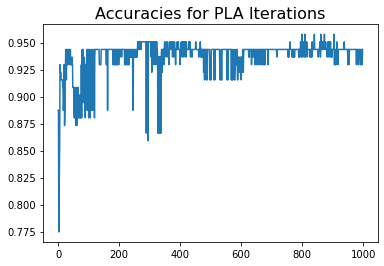

In [25]:
plt.plot(*zip(*sorted(accuracy_dict.items())))
plt.title("Accuracies for PLA Iterations", size=16)
plt.show()

## INTERPRETATION
- The accuracy is 94.36% for the PLA algorithm for number of iterations = 3000 to identify whether the breast cancer is Malignant (1) or Benign (0).  The Perceptron algorithm only works for linearly separable classes. It means classes can be separated by linear function as illustrated in the Scatter Plot above.  Otherwise, it will not work well. For further improvement, the number of iterations can be increased.  For example, with n_iterations = 5000, the accuracy score is at 95.77%, but it requires a lot of more time to compute. 
- It took over 2 hours 14 minutes to collect the accuracy scores over number of iterations = 1000.  To collect more accuracy scores for bigger number of iterations, it will require larger memory space and probably suits better leveraging Big Data technologies such as Spark and Hadoop.

REFERENCE
Loeber, P. (2019). Perceptron in Python - ML From Scratch 06. Retrieved on 10/1/2022 from https://www.python-engineer.com/courses/mlfromscratch/06_perceptron/